In [1]:
import sys
sys.path.append('/lmh_data/work/SEE/analyse/')

import anndata
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import umap

from analyse_util import figure_size, set_plt, set_Border

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hic_pca = pd.read_csv('/lmh_data/data/sclab/Lee2019/BandNorm/embedding.txt', sep='\t')
hic_pca.index = hic_pca.index.str.split(".").map(lambda x: x[0])
hic_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
181218_21yr_2_A1_AD002_L23,890.902763,83.059109,10.409427,3.083012,-49.354259,-32.600687,14.483734,-18.205280,-41.147020,26.329468,...,-75.735664,-3.820232,36.103463,-27.970191,42.335609,-3.901578,82.587591,-25.758200,-22.978127,96.463360
181218_21yr_2_A1_AD004_L23,904.872698,118.306720,-19.466440,-60.319205,-21.003638,18.145742,13.801854,47.763996,-68.598821,-5.905531,...,49.290660,-67.283106,63.113846,-103.293280,326.277678,169.548997,2.469605,53.261816,-125.220526,152.974825
181218_21yr_2_A1_AD006_L6,919.593825,161.310310,-32.728456,-73.150546,-40.742312,-20.245419,7.219258,23.709505,-42.157936,31.101920,...,-115.939807,134.374472,-152.814060,99.921896,-232.474914,98.563518,-60.032190,-6.316850,-56.298253,279.926732
181218_21yr_2_A1_AD008_ODC,847.266348,-202.626888,68.867497,3.661814,9.588173,18.015434,2.675589,-2.031951,-41.755522,-14.324155,...,-2.210585,-21.356662,31.221962,1.551080,10.824116,-24.044750,12.866632,-16.734417,-11.687963,10.222472
181218_21yr_2_A1_AD010_L5,886.009912,56.243458,10.304221,17.604349,-15.108784,12.878859,24.463045,24.169183,-40.195791,15.401737,...,34.124152,-22.576417,32.882791,18.596894,3.256004,-26.359388,11.476817,19.178504,29.270071,52.927332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190315_29yr_6_H9_AD004_ODC,875.749342,-54.474977,62.063033,-3.718579,-26.856854,0.777472,4.115779,11.823778,5.298375,4.900289,...,-11.239674,2.795996,-4.207720,8.334254,-3.466066,3.272328,13.226099,-7.189493,-6.957192,2.088942
190315_29yr_6_H9_AD006_ODC,869.931323,-76.770471,74.170357,-15.045151,-13.061829,20.001922,1.833363,11.767611,-9.040591,-5.036546,...,6.593132,8.693434,0.491497,-0.642918,0.887359,-0.908937,3.024385,-4.100478,7.214831,-5.355590
190315_29yr_6_H9_AD008_L4,912.004776,184.210110,-38.544711,23.696057,-12.341722,20.049228,-4.100016,16.438967,-12.954493,-6.911907,...,-1.795838,1.604240,5.245884,-0.446017,9.135502,4.044941,-9.760894,2.112579,4.890044,0.847785
190315_29yr_6_H9_AD010_Astro,894.382651,66.583788,10.889655,43.946956,85.647281,-63.064850,15.228112,-24.624083,-2.974911,31.133385,...,-4.625787,-19.812551,-10.425295,16.577477,0.681416,-6.781128,-5.698107,1.316502,-2.404099,2.969823


In [3]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/Human_M1_10x/scRNA.h5ad")
rna.obs.cell_type = rna.obs.cell_type.cat.rename_categories({'Oligo': 'ODC'})
rna.layers["counts"] = rna.X.copy()

rna

AnnData object with n_obs × n_vars = 22433 × 50281
    obs: 'cell_type', 'domain'
    layers: 'counts'

In [4]:
target_cell_subtype = ['Astro', 'OPC', 'ODC', 'Endo']

rna = rna[rna.obs[rna.obs['cell_type'].isin(target_cell_subtype)].index,:]

hic_cell_types = hic_pca.index.str.split("_").map(lambda x: x[-1])
hic_pca = hic_pca[hic_cell_types.isin(target_cell_subtype)]

In [5]:
def rna_pca(rna):
    rna.X = rna.layers["counts"].copy()
    sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")
    sc.pp.normalize_total(rna)
    sc.pp.log1p(rna)
    sc.pp.scale(rna)
    sc.tl.pca(rna, n_comps=100, svd_solver="auto")

    sc.pp.neighbors(rna, metric="cosine")
    sc.tl.umap(rna)
    sc.tl.leiden(rna)
rna_pca(rna)

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [6]:
hic_embedding = umap.UMAP(random_state=42, n_neighbors=10, min_dist=0.4).fit_transform(hic_pca.values)
hic_cell_types = hic_pca.index.str.split("_").map(lambda x: x[-1])

In [7]:
def rna_pca(rna):
    rna.X = rna.layers["counts"].copy()
    sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")
    sc.pp.normalize_total(rna)
    sc.pp.log1p(rna)
    sc.pp.scale(rna)
    sc.tl.pca(rna, n_comps=100, svd_solver="auto")

    sc.pp.neighbors(rna, metric="cosine")
    sc.tl.umap(rna)
    sc.tl.leiden(rna)
rna_pca(rna)

rna_embedding = rna.obsm['X_umap']
rna_cell_types = rna.obs['cell_type'].values

In [8]:
cm = plt.cm.get_cmap('tab20')

colormap = dict()
for i in range(len(target_cell_subtype)):
    colormap[target_cell_subtype[i]] = cm(i)
colormap

{'Astro': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 'OPC': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 'ODC': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'Endo': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0)}

In [9]:
def draw(figsize, embedding, cell_types, file_name=None):
    set_plt(figsize=figsize)
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots()

    for i in range(cell_types.unique().shape[0]):
        cell_type = cell_types.unique()[i]
        _embedding = embedding[cell_types==cell_type, :]
        plt.scatter(
            _embedding[:, 0], _embedding[:, 1], label=cell_type,
            c=[colormap[cell_type]]*_embedding.shape[0]
        )

    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.grid(False)
    plt.legend(
        facecolor='white', loc='upper right', framealpha=0, handletextpad=1, borderpad=0, borderaxespad=0
    ).get_frame().set_linewidth(0.0)

    if file_name:
        plt.savefig('/lmh_data/work/SEE/analyse/figure_file/{}.pdf'.format(file_name), bbox_inches='tight')
    plt.show()

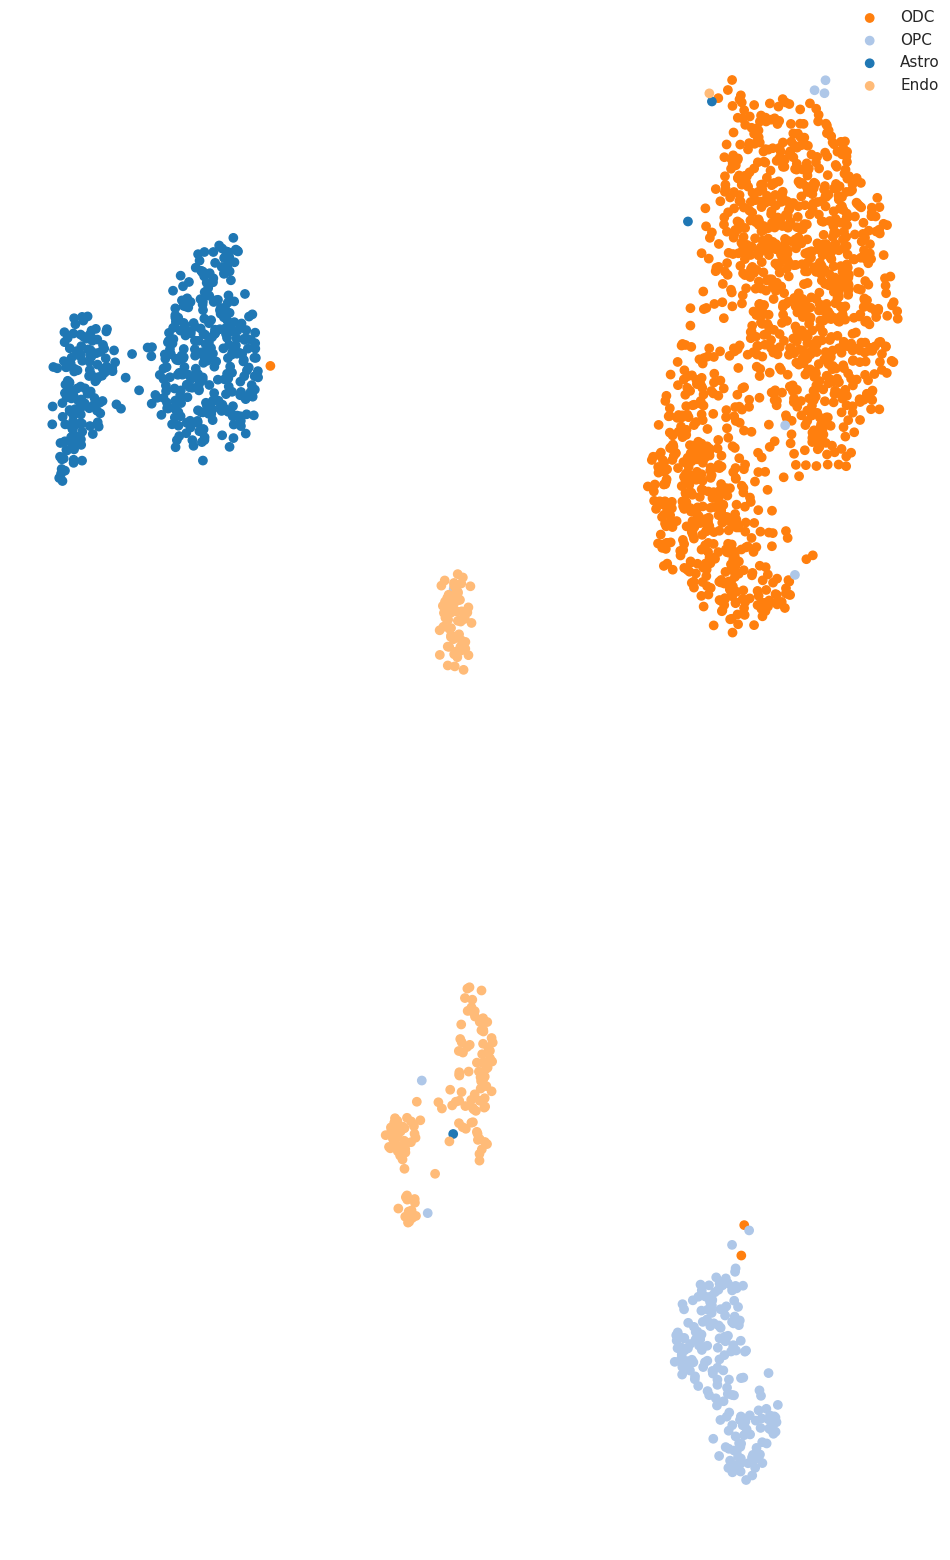

In [10]:
draw((12, 20), hic_embedding, hic_cell_types, 'UMAP(Lee2019)')

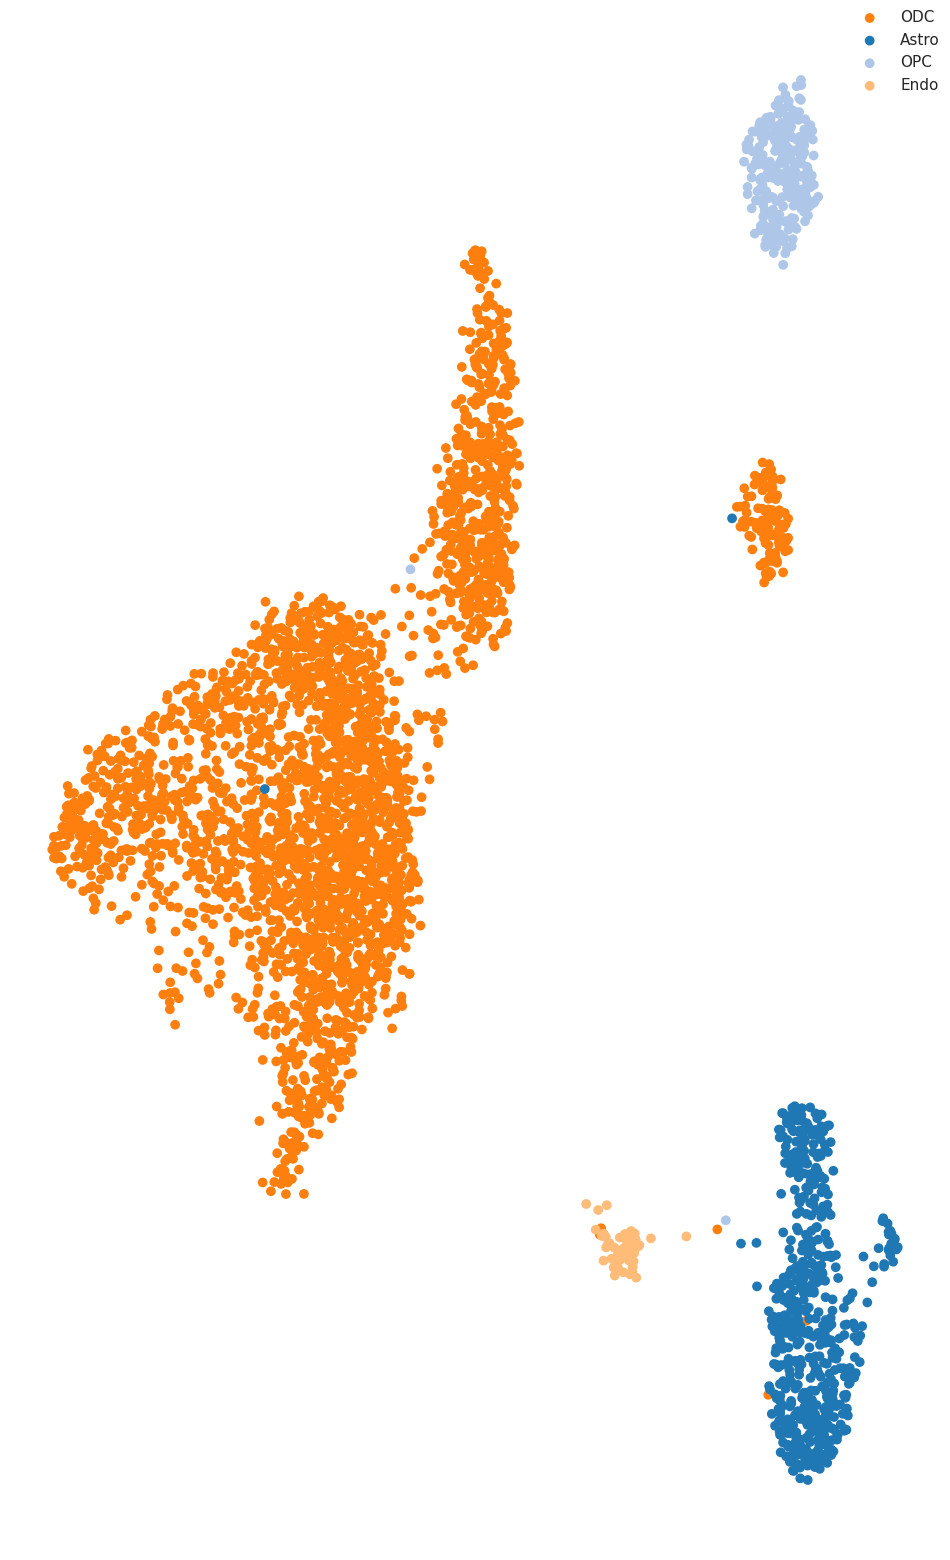

In [11]:
draw((12, 20), rna_embedding, rna_cell_types, 'UMAP(Human_M1_10X)')